Class: AI INSIGHT 

Name: Nguyen Tho Anh Khoa

Facebook: Khoa Nguyen KT

# CNN – Exercise 3

## 1) Đọc hiểu code các file sau.

## -  11.1.CNN-FlexibleInputSize.ipynb về cách thiết kế một model với dymanic input size

## - 11.2.Backprogation.ipynb minh họa cách tính đạo hàm qua các layer phổ biến trong CNN

## - 11.3.LeNet.ipynb cài đặt code cho LeNet model

## - 11.4.VGG16.ipynb cài đặt code cho VGG model với 16 layer

### **11.1.CNN-FlexibleInputSize.ipynb về cách thiết kế một model với dymanic input size**

**Model with fixed input size (28x28x1)**

In [ ]:
# fixed input size

import tensorflow as tf
from tensorflow import keras

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=2, padding='same', activation='relu'))

model.add(keras.layers.Conv2D(512, (7, 7), strides=1, activation='relu'))
model.add(keras.layers.Conv2D(10, (1, 1), strides=1, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 512)         6423040   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          5130      
Total params: 6,816,010
Trainable params: 6,816,010
Non-trainable params: 0
______________________________________________

**Nếu cho input khác với szie ban đầu khai báo 28x28x1 thì hệ thống sẽ báo lỗi hoặc warning**

In [ ]:
# testing with the size (28,28,1)

data = tf.random.normal( (128, 28, 28, 1) )
wrong_input = tf.random.normal( (128, 32, 32, 1) )
print(data.shape)
print(wrong_input.shape)

output = model.predict(data)
print(output.shape)

wrong_output = model.predict(wrong_input)
print(wrong_output.shape)

(128, 28, 28, 1)
(128, 32, 32, 1)
(128, 1, 1, 10)
(128, 2, 2, 10)


**Model with dynamic size**


In [ ]:
# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(None, None, 1)))

model.add(keras.layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=2, padding='same', activation='relu'))

model.add(keras.layers.Conv2D(512, (7, 7), strides=1, activation='relu'))
model.add(keras.layers.Conv2D(10, (1, 1), strides=1, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, None, None, 32)    320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, None, None, 256)   295168    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, None, None, 512)   6423040   
_________________________________________________________________
conv2d_11 (Conv2D)           (None, None, None, 10)    5130      
Total params: 6,816,010
Trainable params: 6,816,010
Non-trainable params: 0
____________________________________________

In [ ]:

shape = (32,28,28,1)
data = tf.random.normal(shape)
print(data.shape)

output = model.predict(data)
print(output.shape)

(32, 28, 28, 1)
(32, 1, 1, 10)


**Dynamic input size with FCL**

**Khi sử dụng Dense layer thì Input shape không được để None**

In [ ]:
# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(None, None, 1)))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

ValueError: ignored

### **11.2.Backprogation.ipynb minh họa cách tính đạo hàm qua các layer phổ biến trong CNN**

#### **Max pooling**

Cách tính đạo hàm **max pooling (mp)**: hoạt động theo chain rule:

- forward:  $ x --^{mp}--> \hat{y} --^{loss\_fnc}--> loss (L) $

- backward: $loss --\frac{\partial L}{\partial\hat{y}}--> dloss --\frac{\partial dloss}{\partial x}--> dx $

Ví dụ: trong đoạn code bên dưới khi đã có data_x, data_y và kết quả sau khi forward qua maxpooling data_after, loss function được chọn là MSE $(\hat{y} - y)^2$

  + Step1: Đạo hàm loss để lấy được $dloss = \frac{1}{n}*2* (\pmb{\hat{y} - y}) $, trong đó n là số lượng element trong 1 window = 4, ví dụ element đầu tiên (row=0, col=0) = $\frac{1}{4} * 2 * (7 -1) = 3. Tương tự sẽ thu được dloss.

  + Step2: Trong max pooling không có paramters nên **những vị trí nào được ghi nhận là max thì sẽ được lấy kết quả của dloss còn các vị trí khác = 0**. Gọi f(k) là max pooling thì $
\begin{equation}
  f^{'}(k) = \begin{cases}
    k, & \text{if it is position of max value}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation} $




In [ ]:
# max_pooling

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

max_pooling = keras.layers.MaxPooling2D(pool_size=2, strides=2)

data_X = np.array([[1, 5, 3, 7],
                   [7, 3, 9, 2],
                   [3, 5, 8, 4],
                   [8, 7, 3, 5]])
data_X = data_X.reshape(1, 4, 4, 1)
data_X = tf.Variable(data_X, dtype=tf.float32)

data_y = np.ones((1, 2, 2, 1))
data_y = tf.Variable(data_y, dtype=tf.float32)

print('\n\n data_X: \n', data_X[0,:,:,0])
print('\n\n data_y: \n', data_y[0,:,:,0])

with tf.GradientTape(persistent=True) as tape:
    data_after = max_pooling(data_X)
    print('\n\n data_after: \n', data_after[0,:,:,0])
    
    loss = tf.reduce_mean((data_after-data_y)**2)
    print('\n\n loss: \n', loss)
    
dloss = tape.gradient(loss, data_after)
print('\n\n dloss: \n', dloss[0,:,:,0])

ddata_X = tape.gradient(loss, data_X)
print('\n\n ddata_X: \n', ddata_X[0,:,:,0])



 data_X: 
 tf.Tensor(
[[1. 5. 3. 7.]
 [7. 3. 9. 2.]
 [3. 5. 8. 4.]
 [8. 7. 3. 5.]], shape=(4, 4), dtype=float32)


 data_y: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


 data_after: 
 tf.Tensor(
[[7. 9.]
 [8. 8.]], shape=(2, 2), dtype=float32)


 loss: 
 tf.Tensor(49.5, shape=(), dtype=float32)


 dloss: 
 tf.Tensor(
[[3.  4. ]
 [3.5 3.5]], shape=(2, 2), dtype=float32)


 ddata_X: 
 tf.Tensor(
[[0.  0.  0.  0. ]
 [3.  0.  4.  0. ]
 [0.  0.  3.5 0. ]
 [3.5 0.  0.  0. ]], shape=(4, 4), dtype=float32)


#### **Average pooling**

Cách tính đạo hàm **average pooling (avp)**: hoạt động theo chain rule:

- forward:  $ x --^{avp}--> \hat{y} --^{loss\_fnc}--> loss (L) $

- backward: $loss --\frac{\partial L}{\partial\hat{y}}--> dloss --\frac{\partial dloss}{\partial x}--> dx $

Ví dụ: trong đoạn code bên dưới khi đã có data_x, data_y và kết quả sau khi forward qua avp được data_after, loss function được chọn là MSE $(\hat{y} - y)^2$

  + Step1: (tương tự max pooling) Đạo hàm loss để lấy được $dloss = \frac{1}{n}*2* (\pmb{\hat{y} - y}) $, trong đó n là số lượng element trong 1 window sau khi qua avp = 4.

  + Step2: Trong avp không có paramters nên **các vị trí sẽ là mean của dloss với size của n**. Gọi f(k) là avp thì $f^{'}(k) = fract{1}{n}*sum(\text{all elemnt in window})$




In [ ]:
# AveragePooling2D

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

avg_pooling = keras.layers.AveragePooling2D(pool_size=2, strides=2)

data_X = np.array([[1, 5, 3, 7],
                   [7, 3, 9, 2],
                   [3, 5, 8, 4],
                   [8, 7, 3, 5]])
data_X = data_X.reshape(1, 4, 4, 1)
data_X = tf.Variable(data_X, dtype=tf.float32)

data_y = np.ones((1, 2, 2, 1))
data_y = tf.Variable(data_y, dtype=tf.float32)

print('\n\n data_X: \n', data_X[0,:,:,0])
print('\n\n data_y: \n', data_y[0,:,:,0])

with tf.GradientTape(persistent=True) as tape:
    data_after = avg_pooling(data_X)
    print('\n\n data_after_ap: \n', data_after[0,:,:,0])
    
    loss = tf.reduce_mean((data_after-data_y)**2)
    print('\n\n loss: \n', loss)
    
dloss = tape.gradient(loss, data_after)
print('\n\n dloss: \n', dloss[0,:,:,0])

ddata_X = tape.gradient(loss, data_X)
print('\n\n ddata_X: \n', ddata_X[0,:,:,0])



 data_X: 
 tf.Tensor(
[[1. 5. 3. 7.]
 [7. 3. 9. 2.]
 [3. 5. 8. 4.]
 [8. 7. 3. 5.]], shape=(4, 4), dtype=float32)


 data_y: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


 data_after_ap: 
 tf.Tensor(
[[4.   5.25]
 [5.75 5.  ]], shape=(2, 2), dtype=float32)


 loss: 
 tf.Tensor(16.40625, shape=(), dtype=float32)


 dloss: 
 tf.Tensor(
[[1.5   2.125]
 [2.375 2.   ]], shape=(2, 2), dtype=float32)


 ddata_X: 
 tf.Tensor(
[[0.375   0.375   0.53125 0.53125]
 [0.375   0.375   0.53125 0.53125]
 [0.59375 0.59375 0.5     0.5    ]
 [0.59375 0.59375 0.5     0.5    ]], shape=(4, 4), dtype=float32)


#### **Convolution**

Tương tự các step như max pooling và average pooling. Hơn thế nữa, có điểm lưu ý là, **vì mỗi 1 element trong window đều có parameter nên khi forward và backward đều phải lấy sum của toàn bộ các elements tham gia**. 

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

conv2D = keras.layers.Conv2D(1, (2, 2), activation='relu')

data_X = np.array([[1, 1, 2],
                   [1, 2, 1],
                   [2, 1, 1]])
data_X = data_X.reshape(1, 3, 3, 1)
data_X = tf.Variable(data_X, dtype=tf.float32)

data_y = np.ones((1, 2, 2, 1))
data_y = tf.Variable(data_y, dtype=tf.float32)

print('\n\n data_X: \n', data_X[0,:,:,0])
print('\n\n data_y: \n', data_y[0,:,:,0])

with tf.GradientTape(persistent=True) as tape: 
    data_after_conv = conv2D(data_X)
    print('\n\n data_after_conv: \n', data_after_conv[0,:,:,0])
    
    # Check the values of the current conv weight
    print('\n\n conv_weight: \n', conv2D.trainable_weights[0][:,:,0,0])
    print('\n conv_bias: \n', conv2D.trainable_weights[1][0])
        
    loss = tf.reduce_mean((data_after_conv-data_y)**2)
    print('\n\n loss: \n', loss)
    
dloss = tape.gradient(loss, data_after_conv)
print('\n\n dloss: \n', dloss[0,:,:,0])

dconv_weight = tape.gradient(loss, conv2D.trainable_weights)
print('\n\n dconv_weight: \n', dconv_weight[0][:,:,0,0])
print('\n dconv_bias: \n', dconv_weight[1][0])



 data_X: 
 tf.Tensor(
[[1. 1. 2.]
 [1. 2. 1.]
 [2. 1. 1.]], shape=(3, 3), dtype=float32)


 data_y: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


 data_after_conv: 
 tf.Tensor(
[[1.2144129  0.2172432 ]
 [0.2172432  0.40390164]], shape=(2, 2), dtype=float32)


 conv_weight: 
 tf.Tensor(
[[-0.05498779  0.24154454]
 [-0.48319083  0.7555235 ]], shape=(2, 2), dtype=float32)

 conv_bias: 
 tf.Tensor(0.0, shape=(), dtype=float32)


 loss: 
 tf.Tensor(0.40668064, shape=(), dtype=float32)


 dloss: 
 tf.Tensor(
[[ 0.10720646 -0.3913784 ]
 [-0.3913784  -0.29804918]], shape=(2, 2), dtype=float32)


 dconv_weight: 
 tf.Tensor(
[[-1.2716486 -1.7563564]
 [-1.7563564 -0.8663931]], shape=(2, 2), dtype=float32)

 dconv_bias: 
 tf.Tensor(-0.97359955, shape=(), dtype=float32)


2) (Optional) Các bạn dựa vào file “11.4.VGG16.ipynb”, thiết kế model tương
tự VGG và
 Áp dụng cho dataset Fashion-MNIST.
 Áp dụng cho dataset Cifar10

#### **Áp dụng cho dataset Fashion-MNIST**

> Indented block



In [47]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Dense, Convolution2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [48]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [49]:
def normalize_features_data(data):
  if len(data.shape) == 3:
    b, h, w = data.shape
    c = 1
  else:
    b, h, w, c = data.shape
  features_mean = np.mean(data, axis=(1,2)).reshape(b,1,c)
  features_stdd = np.mean(data, axis=(1,2)).reshape(b,1,c)
  new_data = data.reshape(b, w*h, c)
  normalized_data = (new_data-features_mean)/features_stdd
  return normalized_data.reshape(b,h,w, c)

x_train = normalize_features_data(x_train)
x_test = normalize_features_data(x_test)

In [50]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Bởi vì kích thước của ảnh là 28x28 và trong khi model VGG16 configuration D nguyên mẫu sẽ trải qua 5 lần max pooling thì kích thước ảnh sẽ giả đi $2^5=32$ lần. Do đó ảnh sẽ được resize về kích thước 64x64**

![image_vgg](https://neurohive.io/wp-content/uploads/2018/11/Capture-564x570.jpg)

In [19]:
def VGG16_Model(input_shape):
  def two_conv(filters, kernel_size, model):
    model.add(Convolution2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
    model.add(Convolution2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    return model

  def three_conv(filters, kernel_size, model):
    model.add(Convolution2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
    model.add(Convolution2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
    model.add(Convolution2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    return model 

  height = width = 64 
  model = keras.models.Sequential()
  model.add(keras.layers.Input(shape=input_shape))
  model.add(tf.keras.layers.experimental.preprocessing.Resizing(height=height, width=width, interpolation="bicubic"))

  model = two_conv(filters=64, kernel_size=3, model=model)
  model = two_conv(filters=128, kernel_size=3, model=model)
  model = three_conv(filters=256, kernel_size=3, model=model)
  model = three_conv(filters=512, kernel_size=3, model=model)
  model = three_conv(filters=512, kernel_size=3, model=model)

  model.add(Flatten())
  model.add(Dense(units=4096, activation='relu'))
  model.add(Dense(units=4096, activation='relu'))
  model.add(Dense(units=10, activation='softmax'))

  return model




In [51]:
VGG16_fashion_mnist = VGG16_Model((28,28,1))
VGG16_fashion_mnist.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_5 (Resizing)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 128)      

**optimizer dùng SGD với learning rate 0.01, momentum 0.9, khi train dùng batchsize 256 như lời đề nghị trong paper**

In [52]:
opt = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9)
VGG16_fashion_mnist.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = VGG16_fashion_mnist.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=256, epochs=15)

Epoch 1/15
235/235 [==============================] - 130s 551ms/step - loss: 2.2827 - accuracy: 0.1418 - val_loss: 2.3000 - val_accuracy: 0.1362
Epoch 2/15
235/235 [==============================] - 130s 553ms/step - loss: 2.0397 - accuracy: 0.2153 - val_loss: 0.9567 - val_accuracy: 0.6201
Epoch 3/15
235/235 [==============================] - 130s 554ms/step - loss: 0.7084 - accuracy: 0.7372 - val_loss: 0.5371 - val_accuracy: 0.8093
Epoch 4/15
235/235 [==============================] - 130s 555ms/step - loss: 0.4418 - accuracy: 0.8359 - val_loss: 0.4131 - val_accuracy: 0.8481
Epoch 5/15
235/235 [==============================] - 130s 555ms/step - loss: 0.3676 - accuracy: 0.8628 - val_loss: 0.3846 - val_accuracy: 0.8593
Epoch 6/15
235/235 [==============================] - 131s 557ms/step - loss: 0.3343 - accuracy: 0.8769 - val_loss: 0.3441 - val_accuracy: 0.8698
Epoch 7/15
235/235 [==============================] - 131s 556ms/step - loss: 0.2982 - accuracy: 0.8875 - val_loss: 0.3467 -

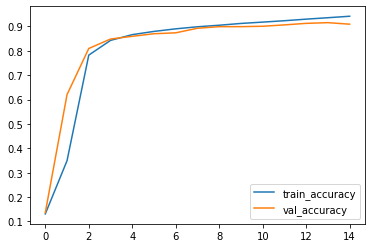

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
plt.legend()

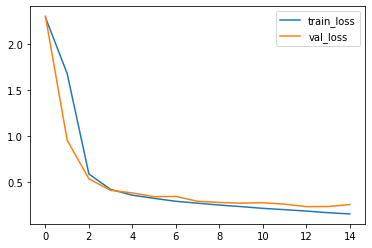

In [62]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.xlabel('epoch')
# plt.ylabel('loss')
plt.legend()

#### **Áp dụng cho dataset CIFAR10**


**Tương tự như data fashion mnist 1 bức ảnh CIFAR10 có kích thước là 32x32x3 do đó khi đưa vào VGG16 (giảm đi 32 lần ơp layer cuối cùng trong extractor do đó sẽ được resize lại với kích thước là 64x64x3 và cấu hình training tương tự**

In [35]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Dense, Convolution2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [36]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [37]:

x_train = normalize_features_data(x_train)
x_test = normalize_features_data(x_test)

In [40]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [41]:
VGG16_cifar10 = VGG16_Model((32,32,3))
VGG16_cifar10.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_4 (Resizing)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 128)      

In [42]:
opt = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9)
VGG16_cifar10.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = VGG16_cifar10.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=256, epochs=15)

Epoch 1/15
196/196 [==============================] - 113s 569ms/step - loss: 2.3015 - accuracy: 0.1094 - val_loss: 2.2750 - val_accuracy: 0.1594
Epoch 2/15
196/196 [==============================] - 109s 558ms/step - loss: 2.1692 - accuracy: 0.2203 - val_loss: 1.7514 - val_accuracy: 0.3705
Epoch 3/15
196/196 [==============================] - 109s 558ms/step - loss: 1.7628 - accuracy: 0.3665 - val_loss: 1.8188 - val_accuracy: 0.3576
Epoch 4/15
196/196 [==============================] - 109s 558ms/step - loss: 1.5549 - accuracy: 0.4397 - val_loss: 1.4506 - val_accuracy: 0.4754
Epoch 5/15
196/196 [==============================] - 110s 559ms/step - loss: 1.3084 - accuracy: 0.5293 - val_loss: 1.3292 - val_accuracy: 0.5348
Epoch 6/15
196/196 [==============================] - 110s 559ms/step - loss: 1.1089 - accuracy: 0.6062 - val_loss: 1.0286 - val_accuracy: 0.6405
Epoch 7/15
196/196 [==============================] - 110s 560ms/step - loss: 0.8737 - accuracy: 0.6956 - val_loss: 0.8675 -

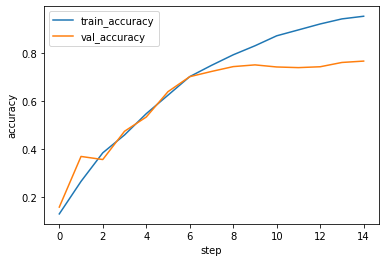

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('step')
plt.ylabel('accuracy')
plt.legend()

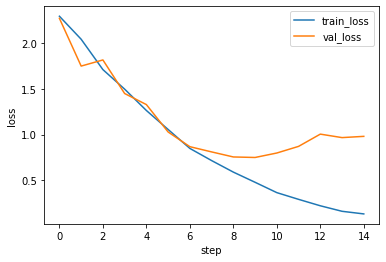

In [46]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()